# Task 0

In [61]:
import numpy as np


def convolve_grayscale_valid(images, kernel):
    """
        A function that performs a valid convolution on grayscale images

        :param images: ndarray, shape(m, h, w), multiple grayscale images
        :param kernel: ndarray, shape(kh,kw), kernel for convolution

        :return: ndarray containing convolved images
    """
    # size images and kernel
    m, h, w = images.shape
    kh, kw = kernel.shape

    # output size
    output_height = h - kh + 1
    output_width = w - kw + 1

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width))

    # convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract region from each image
            image_zone = images[:, i:i+kh, j:j+kw]

            # element wize multiplication
            convolved_images[:, i, j] = np.sum(image_zone * kernel,
                                               axis=(1, 2))

    return convolved_images


(50000, 28, 28)
(50000, 26, 26)


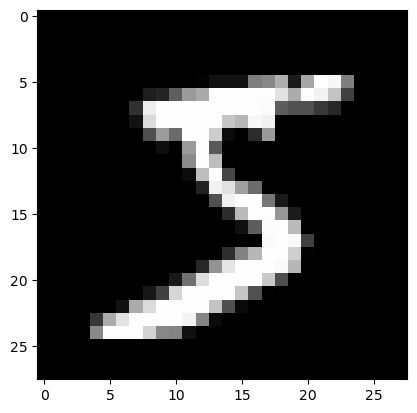

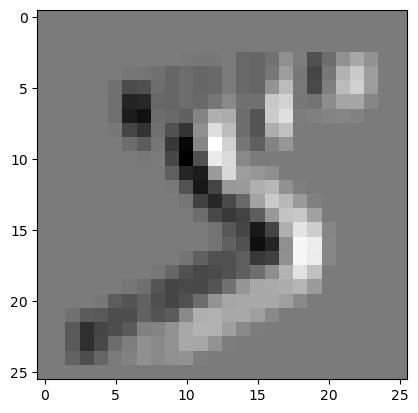

In [62]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':

    dataset = np.load('MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_valid(images, kernel)
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

# Task 1


In [63]:
#!/usr/bin/env python3
"""
    A script that performs a same convolution on grayscale images
"""

import numpy as np


def convolve_grayscale_same(images, kernel):
    """
        A function that performs a same convolution on grayscale images

        :param images: ndarray, shape(m, h, w), multiple grayscale images
        :param kernel: ndarray, shape(kh,kw), kernel for convolution

        :return: ndarray containing convolved images
    """
    # size images and kernel
    m, h, w = images.shape
    kh, kw = kernel.shape

    # output size
    output_height = h
    output_width = w

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width))

    # calcul padding (size odd or even)
    padding_width = int(kw / 2)
    padding_height = int(kh / 2)

    # add zero padding to the input images
    image_pad = np.pad(images,
                       ((0, 0), (padding_height, padding_height),
                        (padding_width, padding_width)), mode='constant')

    # convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract region from each image
            image_zone = image_pad[:, i:i+kh, j:j+kw]

            # element wize multiplication
            convolved_images[:, i, j] = np.sum(image_zone * kernel,
                                               axis=(1, 2))

    return convolved_images


(50000, 28, 28)
(50000, 28, 28)


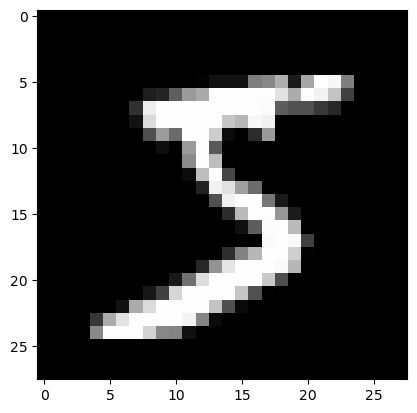

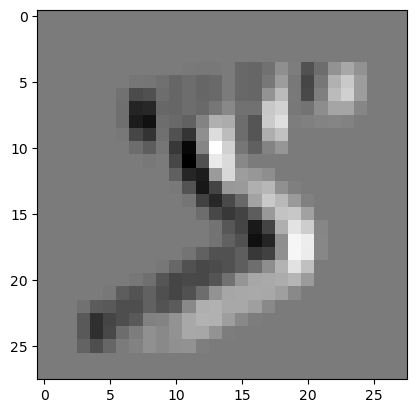

In [65]:
import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':

    dataset = np.load('MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_same(images, kernel)
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

# Task 2

In [66]:

import numpy as np


def convolve_grayscale_padding(images, kernel, padding):
    """
        A function that performs a convolution on grayscale images
        with custom padding

        :param images: ndarray, shape(m, h, w), multiple grayscale images
        :param kernel: ndarray, shape(kh,kw), kernel for convolution
        :param padding: tupple (ph,pw)

        :return: ndarray containing convolved images
    """
    # size images and kernel
    m, h, w = images.shape
    kh, kw = kernel.shape
    ph, pw = padding

    # output size
    output_height = h - kh + 1 + 2 * ph
    output_width = w - kw + 1 + 2 * pw

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width))

    # add zero padding to the input images
    image_pad = np.pad(images,
                       ((0, 0), (ph, ph),
                        (pw, pw)), mode='constant')

    # convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract region from each image
            image_zone = image_pad[:, i:i+kh, j:j+kw]

            # element wize multiplication
            convolved_images[:, i, j] = np.sum(image_zone * kernel,
                                               axis=(1, 2))

    return convolved_images


(50000, 28, 28)
(50000, 30, 34)


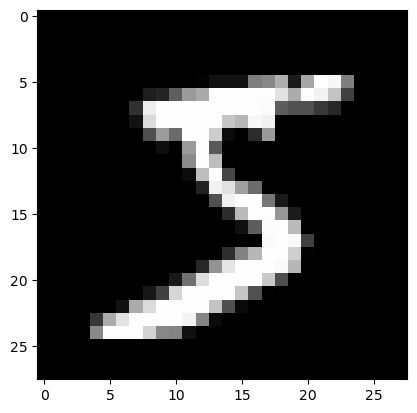

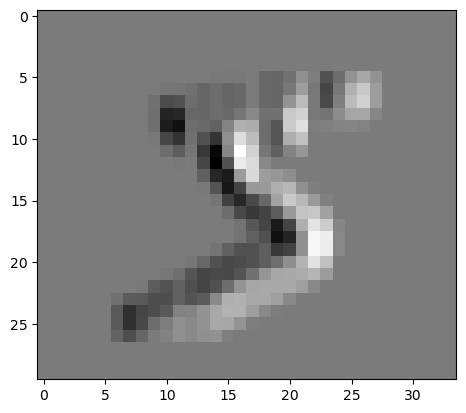

In [67]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':

    dataset = np.load('MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

# Task 3

In [45]:
import numpy as np


def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):
    """
        A function that performs a convolution on grayscale images

        :param images: ndarray, shape(m, h, w), multiple grayscale images
        :param kernel: ndarray, shape(kh,kw), kernel for convolution
        :param padding: tuple (ph,pw) and 'same" or "valid'
        :param stride: tuple (sh, sw)

        :return: ndarray containing convolved images
    """
    # size images, kernel, padding, stride
    m, h, w = images.shape
    kh, kw = kernel.shape
    sh, sw = stride

    # output size and padding
    if padding == 'valid':
        # no padding
        ph, pw = 0, 0
    elif padding == 'same':
        """
            (h - 1) * sh : total distance traveled by the filter
             when moving vertically over the image
            (+ kh - h): size of the filter (kh) subtract the height image (h)
             to ensure the filter stays entirely within the image.
            /2 : get the distance from the center of the image
            to the top or bottom edge
            + 1 : add 1 to ensure that even if the distance is a decimal,
            we round up to ensure the filter stays entirely within the image.
            """
        ph = int((((h - 1) * sh + kh - h)/2) + 1)
        pw = int((((w - 1) * sw + kw - w)/2) + 1)

    elif isinstance(padding, tuple):
        ph, pw = padding

    # generalize output calcul
    output_height = int((h - kh + 2 * ph) / sh + 1)
    output_width = int((w - kw + 2 * pw) / sw + 1)

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width))

    # pad image
    image_pad = np.pad(images,
                       ((0, 0), (ph, ph),
                        (pw, pw)), mode='constant')

    # convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract region from each image
            image_zone = image_pad[:, i * sh:i * sh + kh, j * sw:j * sw + kw]

            # element wize multiplication
            convolved_images[:, i, j] = np.sum(image_zone * kernel,
                                               axis=(1, 2))

    return convolved_images


(50000, 28, 28)
(50000, 13, 13)


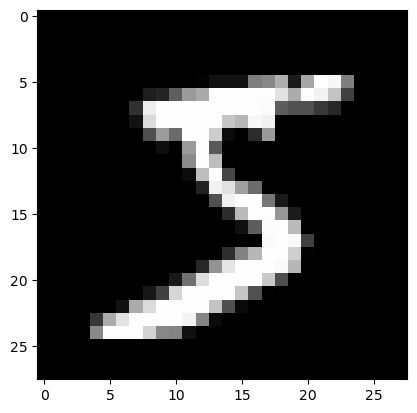

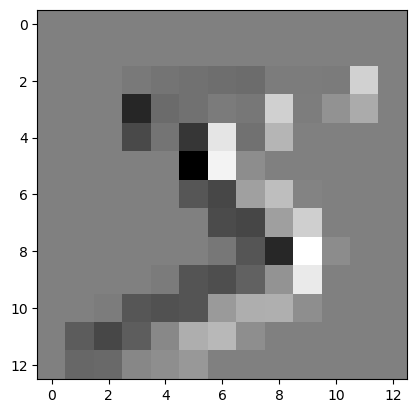

In [44]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':

    dataset = np.load('MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale(images, kernel, padding='valid', stride=(2, 2))
    print(images_conv.shape)

    plt.imshow(images[0], cmap='gray')
    plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

# Task 4

In [68]:

import numpy as np


def convolve_channels(images, kernel, padding='same', stride=(1, 1)):
    """
        A function that performs a convolution on images with channels

        :param images: ndarray, shape(m, h, w, c), multiple images
        :param kernel: ndarray, shape(kh,kw, c), kernel for convolution
        :param padding: tuple (ph,pw) or 'same" or "valid'
        :param stride: tuple (sh, sw)

        :return: ndarray containing convolved images
    """
    # size images, kernel, padding, stride
    m, h, w, c = images.shape
    kh, kw, _ = kernel.shape
    sh, sw = stride

    # output size and padding
    if padding == 'valid':
        # no padding
        ph, pw = 0, 0
    elif padding == 'same':
        ph = int((((h - 1) * sh + kh - h) / 2) + 1)
        pw = int((((w - 1) * sw + kw - w) / 2) + 1)

    elif isinstance(padding, tuple):
        ph, pw = padding

    # generalize output calcul
    output_height = int((h - kh + 2 * ph) / sh + 1)
    output_width = int((w - kw + 2 * pw) / sw + 1)

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width))

    # pad image
    image_pad = np.pad(images,
                       ((0, 0), (ph, ph),
                        (pw, pw), (0, 0)), mode='constant')

    # convolution
    for i in range(output_height):
        for j in range(output_width):
            # extract region from each image
            image_zone = image_pad[:, i * sh:i * sh + kh,
                                   j * sw:j * sw + kw, :]

            # element wize multiplication
            convolved_images[:, i, j] = np.sum(image_zone * kernel,
                                               axis=(1, 2, 3))

    return convolved_images


(10000, 32, 32, 3)
(10000, 30, 30)


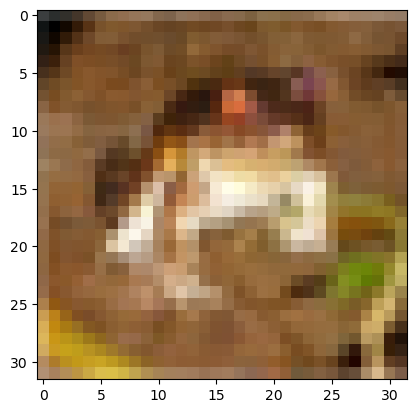

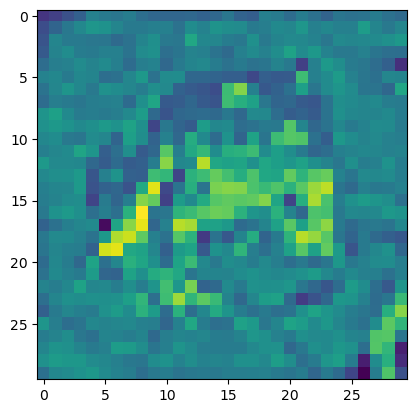

In [69]:

import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':

    dataset = np.load('animals_1.npz')
    images = dataset['data']
    print(images.shape)
    kernel = np.array([[[0, 0, 0], [-1, -1, -1], [0, 0, 0]], [[-1, -1, -1], [5, 5, 5], [-1, -1, -1]], [[0, 0, 0], [-1, -1, -1], [0, 0, 0]]])
    images_conv = convolve_channels(images, kernel, padding='valid')
    print(images_conv.shape)

    plt.imshow(images[0])
    plt.show()
    plt.imshow(images_conv[0])
    plt.show()

# Task 5

In [70]:

import numpy as np


def convolve(images, kernel, padding='same', stride=(1, 1)):
    """
        A function that performs a convolution on images using multiple kernel

        :param images: ndarray, shape(m, h, w, c), multiple images
        :param kernel: ndarray, shape(kh,kw,c,nc), kernel for convolution
        :param padding: tuple (ph,pw) or 'same" or "valid'
        :param stride: tuple (sh, sw)

        :return: ndarray containing convolved images
    """
    # size images, kernel, padding, stride
    m, h, w, c = images.shape
    kh, kw, _, nc = kernel.shape
    sh, sw = stride

    # output size and padding
    if padding == 'valid':
        # no padding
        ph, pw = 0, 0
    elif padding == 'same':
        ph = int((((h - 1) * sh + kh - h) / 2) + 1)
        pw = int((((w - 1) * sw + kw - w) / 2) + 1)

    elif isinstance(padding, tuple):
        ph, pw = padding

    # generalize output calcul
    output_height = int((h - kh + 2 * ph) / sh + 1)
    output_width = int((w - kw + 2 * pw) / sw + 1)

    # initialize output
    convolved_images = np.zeros((m, output_height, output_width, nc))

    # pad image
    image_pad = np.pad(images,
                       ((0, 0), (ph, ph),
                        (pw, pw), (0, 0)), mode='constant')

    # convolution
    for k in range(nc):
        for i in range(output_height):
            for j in range(output_width):
                # extract region from each image
                image_zone = image_pad[:, i * sh:i * sh + kh,
                                       j * sw:j * sw + kw, :]

                # element wize multiplication
                convolved_images[:, i, j, k] = np.sum(image_zone
                                                      * kernel[:, :, :, k],
                                                      axis=(1, 2, 3))

    return convolved_images


(10000, 32, 32, 3)
(10000, 30, 30, 3)


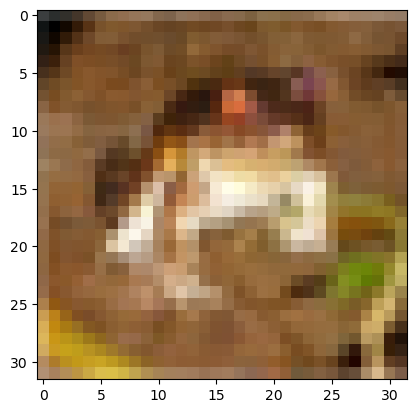

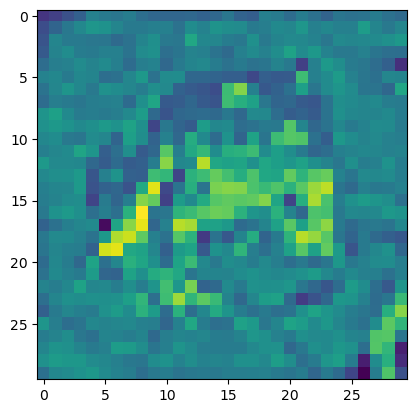

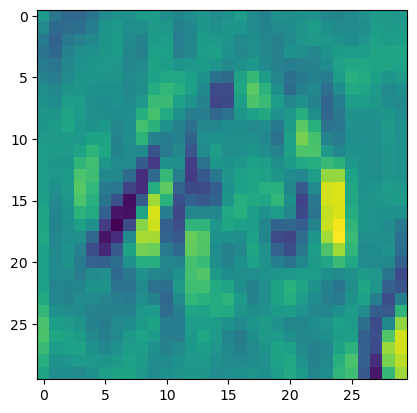

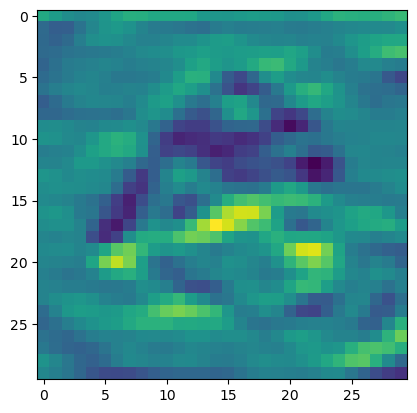

In [72]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':

    dataset = np.load('animals_1.npz')
    images = dataset['data']
    print(images.shape)
    kernels = np.array([[[[0, 1, 1], [0, 1, 1], [0, 1, 1]], [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], [[0, -1, 1], [0, -1, 1], [0, -1, 1]]],
                       [[[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]], [[5, 0, 0], [5, 0, 0], [5, 0, 0]], [[-1, -1, 0], [-1, -1, 0], [-1, -1, 0]]],
                       [[[0, 1, -1], [0, 1, -1], [0, 1, -1]], [[-1, 0, -1], [-1, 0, -1], [-1, 0, -1]], [[0, -1, -1], [0, -1, -1], [0, -1, -1]]]])

    images_conv = convolve(images, kernels, padding='valid')
    print(images_conv.shape)

    plt.imshow(images[0])
    plt.show()
    plt.imshow(images_conv[0, :, :, 0])
    plt.show()
    plt.imshow(images_conv[0, :, :, 1])
    plt.show()
    plt.imshow(images_conv[0, :, :, 2])
    plt.show()

# Task 6

In [75]:
#!/usr/bin/env python3
"""
    A script that performs pooling on images
"""

import numpy as np


def pool(images, kernel_shape, stride, mode='max'):
    """
        A function that performs pooling on images

        :param images: ndarray, shape(m, h, w, c), multiple images
        :param kernel_shape: ndarray, shape(kh,kw), kernel shape for pooling
        :param stride: tuple (sh, sw)
        :param mode: type of pooling 'max' or 'avg'

        :return: ndarray containing pooled images

    """
    # size images, kernel, padding, stride
    m, h, w, c = images.shape
    kh, kw = kernel_shape
    sh, sw = stride

    # output size
    output_height = int((h - kh) / sh + 1)
    output_width = int((w - kw) / sw + 1)

    # initialize output
    pooled_images = np.zeros((m, output_height, output_width, c))

    for i in range(output_height):
        for j in range(output_width):
            image_zone = images[:, i * sh:i * sh + kh,
                                j * sw:j * sw + kw, :]
            if mode == 'max':
                pooled_images[:, i, j, :] = np.max(image_zone, axis=(1, 2))
            elif mode == 'avg':
                pooled_images[:, i, j, :] = np.average(image_zone, axis=(1, 2))

    return pooled_images


(10000, 32, 32, 3)
(10000, 16, 16, 3)


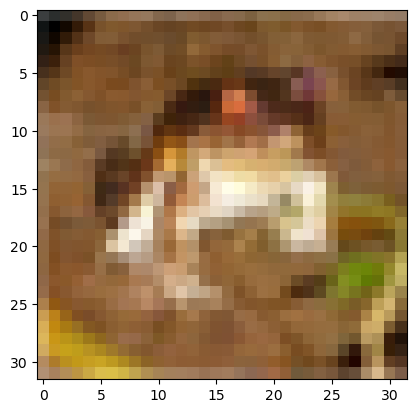

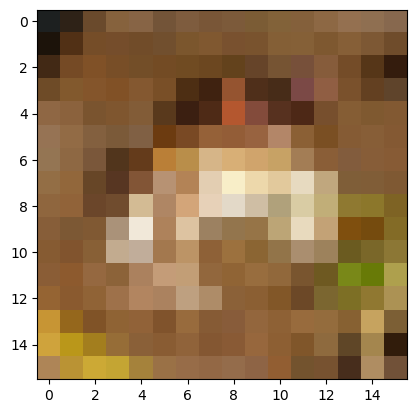

In [74]:


import matplotlib.pyplot as plt
import numpy as np



if __name__ == '__main__':

    dataset = np.load('animals_1.npz')
    images = dataset['data']
    print(images.shape)
    images_pool = pool(images, (2, 2), (2, 2), mode='avg')
    print(images_pool.shape)

    plt.imshow(images[0])
    plt.show()
    plt.imshow(images_pool[0] / 255)
    plt.show()